In [416]:
#Import dependencies
import csv
import os
import matplotlib as plt
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from importlib import resources
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import time
from selenium import webdriver
from IPython.display import Image
import plotly.express as px
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm


## Data Cleaning

# Data file  01.Family Planning

In [417]:
#RR#importing Raw-data 
df = pd.read_csv('Resources\Modern Family Planning_Raw data.csv')
df.head(5)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,text,AFR,Africa,Country,UGA,Uganda,Year,2021,...,NaN,NaN,NaN,NaN,NaN,65.5,NaN,The global indicator represents all women of r...,EN,2023-03-08T05:00:00.000Z
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,text,AFR,Africa,Country,NER,Niger,Year,2020-2021,...,NaN,NaN,NaN,NaN,NaN,36.9,NaN,Niger 2021 PMA Survey Phase 1,EN,2023-03-08T05:00:00.000Z
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,text,AFR,Africa,Country,BFA,Burkina Faso,Year,2020-2021,...,NaN,NaN,NaN,NaN,NaN,58.2,NaN,Burkina Faso 2021 PMA Survey Phase 2,EN,2023-03-08T05:00:00.000Z
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,text,WPR,Western Pacific,Country,VNM,Viet Nam,Year,2020-2021,...,NaN,NaN,NaN,NaN,NaN,72.1,NaN,The global indicator represents all women of r...,EN,2023-03-08T05:00:00.000Z
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,text,AFR,Africa,Country,CIV,Cote d'Ivoire,Year,2020,...,NaN,NaN,NaN,NaN,NaN,46.1,NaN,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2023-03-08T05:00:00.000Z


In [418]:
#RR##checking numbers of Columns
df.columns

Index(['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode',
       'ParentLocation', 'Location type', 'SpatialDimValueCode', 'Location',
       'Period type', 'Period', 'IsLatestYear', 'Dim1 type', 'Dim1',
       'Dim1ValueCode', 'Dim2 type', 'Dim2', 'Dim2ValueCode', 'Dim3 type',
       'Dim3', 'Dim3ValueCode', 'DataSourceDimValueCode', 'DataSource',
       'FactValueNumericPrefix', 'FactValueNumeric', 'FactValueUoM',
       'FactValueNumericLowPrefix', 'FactValueNumericLow',
       'FactValueNumericHighPrefix', 'FactValueNumericHigh', 'Value',
       'FactValueTranslationID', 'FactComments', 'Language', 'DateModified'],
      dtype='object')

In [419]:
#RR#removing unnecessery columns 
drop_colums = df.drop(['ValueType','Location type','Period type','Dim1 type','IsLatestYear','Dim1ValueCode','Dim2 type','Dim2ValueCode',
         'Dim3 type', 'Dim3', 'Dim3ValueCode','DataSourceDimValueCode', 'DataSource','FactValueNumericPrefix','FactValueUoM',
          'FactValueTranslationID', 'FactValueNumericHigh','FactValueNumericHighPrefix','FactValueNumericLow',
         'FactValueNumericLowPrefix','DateModified'], axis=1)
drop_colums.head(5)

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,Dim1,Dim2,FactValueNumeric,Value,FactComments,Language
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,2021,Female,15-49 years,65.5,65.5,The global indicator represents all women of r...,EN
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,2020-2021,Female,15-49 years,36.9,36.9,Niger 2021 PMA Survey Phase 1,EN
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,2020-2021,Female,15-49 years,58.2,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,2020-2021,Female,15-49 years,72.1,72.1,The global indicator represents all women of r...,EN
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,2020,Female,15-49 years,46.1,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN


In [420]:
#RR#Removing duplicate column
Cleaned_Data = drop_colums.drop(['FactValueNumeric'], axis=1)
Cleaned_Data.head(5)

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,Dim1,Dim2,Value,FactComments,Language
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,2021,Female,15-49 years,65.5,The global indicator represents all women of r...,EN
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,2020-2021,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,2020-2021,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,2020-2021,Female,15-49 years,72.1,The global indicator represents all women of r...,EN
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,2020,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN


In [421]:
#RR#Extracted coulmns List
Cleaned_Data.columns

Index(['IndicatorCode', 'Indicator', 'ParentLocationCode', 'ParentLocation',
       'SpatialDimValueCode', 'Location', 'Period', 'Dim1', 'Dim2', 'Value',
       'FactComments', 'Language'],
      dtype='object')

In [422]:
Cleaned_Data.head(5)

,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period,Dim1,Dim2,Value,FactComments,Language
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,2021,Female,15-49 years,65.5,The global indicator represents all women of r...,EN
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,2020-2021,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,2020-2021,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,2020-2021,Female,15-49 years,72.1,The global indicator represents all women of r...,EN
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,2020,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN


In [423]:
#RR#Renaming Colums
Cleaned_Data = Cleaned_Data.rename(columns={'Dim1':'Gender','Dim2':'Age_Group','Value':'Planning_Value_Rate','Language':'Language_Code', 'Location':'Country',
                                            'SpatialDimValueCode':'Country_Code', 'ParentLocation':'ParentLocation_Continent',
                                            'ParentLocationCode':'Patents_Continent_Code'})

In [424]:
#RR#Checking the null values
Cleaned_Data.isnull()

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Period,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
132,False,False,False,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False,False,False,False
135,False,False,False,False,False,False,False,False,False,False,False,False


In [425]:
#RR#checking duplicates
Cleaned_Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
132    False
133    False
134    False
135    False
136    False
Length: 137, dtype: bool

In [426]:
#RR#split up span in to start and end date
Cleaned_Data['Period']

0           2021
1      2020-2021
2      2020-2021
3      2020-2021
4           2020
         ...    
132         2006
133         2005
134    2004-2005
135         2004
136         2001
Name: Period, Length: 137, dtype: object

> Family planning - Data Transformation

In [427]:
#RR#Splitting years by pattern '-'
Cleaned_Data['Period'].str.split(pat='-')

0            [2021]
1      [2020, 2021]
2      [2020, 2021]
3      [2020, 2021]
4            [2020]
           ...     
132          [2006]
133          [2005]
134    [2004, 2005]
135          [2004]
136          [2001]
Name: Period, Length: 137, dtype: object

In [428]:
#RR# checking plit where 0=starting year=LHS values
Cleaned_Data['Period'].str.split(pat='-').str[0]

0      2021
1      2020
2      2020
3      2020
4      2020
       ... 
132    2006
133    2005
134    2004
135    2004
136    2001
Name: Period, Length: 137, dtype: object

In [429]:
#RR#adding left hand values to new column name 'Starting_Year'
Cleaned_Data['Starting_Year'] = Cleaned_Data['Period'].str.split(pat='-').str[0]

In [430]:
#RR#checking split where 1=year_Ending=RHS values
Cleaned_Data['Period'].str.split(pat='-').str[1]

0       NaN
1      2021
2      2021
3      2021
4       NaN
       ... 
132     NaN
133     NaN
134    2005
135     NaN
136     NaN
Name: Period, Length: 137, dtype: object

In [431]:
#RR#adding Right hand values to new column name 'Year_Ending'
Cleaned_Data['Year_Ending'] = Cleaned_Data['Period'].str.split(pat='-').str[1]

In [432]:
Cleaned_Data.head(5)

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Period,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,2021,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,NaN
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,2020-2021,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,2020-2021,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,2020-2021,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,2020,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,NaN


In [433]:
#RR# checking null values for column 'year_Ending'
Cleaned_Data.isnull()

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Period,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,False,False,False,False,False,False,False,False,False,False,False,False,False,True
133,False,False,False,False,False,False,False,False,False,False,False,False,False,True
134,False,False,False,False,False,False,False,False,False,False,False,False,False,False
135,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [434]:
#RR#checking records who is carrying null values for year_ending column
Cleaned_Data[Cleaned_Data['Year_Ending'].isna()==1]

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Period,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,2021,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,NaN
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,2020,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,NaN
5,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,EUR,Europe,MDA,Republic of Moldova,2020,Female,15-49 years,59.5,Moldova 2020 Gender and Generations Survey,EN,2020,NaN
6,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,ETH,Ethiopia,2020,Female,15-49 years,62.6,The global indicator represents all women of r...,EN,2020,NaN
7,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,MDG,Madagascar,2020,Female,15-49 years,65.6,The global indicator represents all women of r...,EN,2020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,MHL,Marshall Islands,2007,Female,15-49 years,80.5,The global indicator represents all women of r...,EN,2007,NaN
132,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,EUR,Europe,AZE,Azerbaijan,2006,Female,15-49 years,21.5,The global indicator represents all women of r...,EN,2006,NaN
133,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CPV,Cabo Verde,2005,Female,15-49 years,73.2,The global indicator represents all women of r...,EN,2005,NaN
135,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,EUR,Europe,ROU,Romania,2004,Female,15-49 years,46.5,The global indicator represents all women of r...,EN,2004,NaN


In [435]:
#RR#replacing null values by zero
Cleaned_Data['Year_Ending'] = Cleaned_Data['Year_Ending'].fillna(Cleaned_Data['Starting_Year'])
Cleaned_Data.head(5)

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Period,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,2021,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,2020-2021,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,2020-2021,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,2020-2021,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,2020,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020


In [436]:
#dropping unrelevant Column
Cleaned_Data=Cleaned_Data.drop(['Period'],axis=1)
Cleaned_Data.head(5)

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020


In [437]:
#RR# Varifying null values for column 'year_Ending'
Cleaned_Data.isnull()

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,False,False,False,False,False,False,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False,False,False,False,False,False,False
135,False,False,False,False,False,False,False,False,False,False,False,False,False


In [438]:
#RR# checking null values for column 'year_Ending'
Cleaned_Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
132    False
133    False
134    False
135    False
136    False
Length: 137, dtype: bool

In [439]:
#RR#Checking Data type
Cleaned_Data.dtypes

IndicatorCode                object
Indicator                    object
Patents_Continent_Code       object
ParentLocation_Continent     object
Country_Code                 object
Country                      object
Gender                       object
Age_Group                    object
Planning_Value_Rate         float64
FactComments                 object
Language_Code                object
Starting_Year                object
Year_Ending                  object
dtype: object

In [440]:
#RR# changing data type
Cleaned_Data['Starting_Year'] = pd.to_numeric(Cleaned_Data['Starting_Year'], errors='coerce')
Cleaned_Data['Year_Ending'] = pd.to_numeric(Cleaned_Data['Year_Ending'], errors='coerce')
Cleaned_Data['Gender'] = Cleaned_Data['Gender'].astype('category')

In [441]:
#RR# partially Cleaned DataFrame
Cleaned_Data.head(5)

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020


In [442]:
#RR#change data type
#Create a new column by merging Starting_Year and Year_Ending
# Cleaned_Data['Period_range'] = Cleaned_Data['Starting_Year'].astype(str) + '-' + Cleaned_Data['Year_Ending'].astype(str)
# Cleaned_Data.head(5)

In [443]:
Cleaned_Data.head(5)

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020


In [444]:
# Function to determine the range for each Year_Period
def get_year_range(end_year):
 
    if 2003 <= end_year <= 2005:
        return '2003-2005'
    elif 2006 <= end_year <= 2008:
        return '2006-2008'
    elif 2009 <= end_year <= 2011:
        return '2009-2011'
    elif 2012 <= end_year <= 2014:
        return '2012-2014'
    elif 2015 <= end_year <= 2017:
        return '2015-2017'
    elif 2018 <= end_year <= 2020:
        return '2018-2020'
    elif 2021 <= end_year <= 2023:
        return '2021-2023'
    else:
        return 'Out of Range'

# Apply the function to Year_Period
Cleaned_Data['Period_Range'] = Cleaned_Data['Year_Ending'].apply(get_year_range)

# Display the DataFrame with the new Year_Range column
Cleaned_Data.head(5)

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending,Period_Range
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2023
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2021-2023
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2021-2023
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2021-2023
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020,2018-2020


In [445]:
#RR#Checking updated Data type for column year ending and starting year column
Cleaned_Data.dtypes

IndicatorCode                 object
Indicator                     object
Patents_Continent_Code        object
ParentLocation_Continent      object
Country_Code                  object
Country                       object
Gender                      category
Age_Group                     object
Planning_Value_Rate          float64
FactComments                  object
Language_Code                 object
Starting_Year                  int64
Year_Ending                    int64
Period_Range                  object
dtype: object

Family planning - cleaned Data extracted 

In [446]:
#RR# Export the cleaned data to CSV
Cleaned_Data.to_csv("Output/family_planning.csv", index=False)

In [447]:
##RR Summary stats
summary_stats = Cleaned_Data.describe()
summary_stats

,Planning_Value_Rate,Starting_Year,Year_Ending
count,137.000000,137.000000,137.000000
mean,58.202190,2015.518248,2015.912409
std,21.202069,4.042244,4.080936
min,2.100000,2001.000000,2001.000000
25%,42.100000,2014.000000,2014.000000
50%,60.000000,2017.000000,2017.000000
75%,77.300000,2019.000000,2019.000000
max,96.600000,2021.000000,2021.000000


# Data file 02. Adolescent birth rates

In [448]:
#HS# Load the data
Hdf = pd.read_csv('Resources/Hdata.csv')

# Display the first few rows of the DataFrame to verify
Hdf.head(5)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MDG_0000000003,Adolescent birth rate (per 1000 women),text,EUR,Europe,Country,HRV,Croatia,Year,2023,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Registration National Statistics,EN,2024-03-26 00:00:00
1,MDG_0000000003,Adolescent birth rate (per 1000 women),text,EUR,Europe,Country,HRV,Croatia,Year,2023,...,NaN,NaN,NaN,NaN,NaN,6.7,NaN,Registration National Statistics,EN,2024-03-26 00:00:00
2,MDG_0000000003,Adolescent birth rate (per 1000 women),text,EMR,Eastern Mediterranean,Country,YEM,Yemen,Year,2023,...,NaN,NaN,NaN,NaN,NaN,77.0,NaN,Yemen 2022-2023 Multiple Indicator Cluster Survey,EN,2024-03-26 00:00:00
3,MDG_0000000003,Adolescent birth rate (per 1000 women),text,GLOBAL,Global,Country,MAC,"China, Macao Special Administrative Region",Year,2022,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Registration National Statistics & WPP2022,EN,2024-03-26 00:00:00
4,MDG_0000000003,Adolescent birth rate (per 1000 women),text,EUR,Europe,Country,DNK,Denmark,Year,2022,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Registration National Statistics & WPP2022,EN,2024-03-26 00:00:00


In [449]:
Hdf_cleaned = Hdf[['ParentLocation', 'Location', 'Period', 'Dim2', 'Value', 'FactComments']]

Hdf_cleaned.head()

,ParentLocation,Location,Period,Dim2,Value,FactComments
0,Europe,Croatia,2023,10-14 years,0.0,Registration National Statistics
1,Europe,Croatia,2023,15-19 years,6.7,Registration National Statistics
2,Eastern Mediterranean,Yemen,2023,15-19 years,77.0,Yemen 2022-2023 Multiple Indicator Cluster Survey
3,Global,"China, Macao Special Administrative Region",2022,10-14 years,0.0,Registration National Statistics & WPP2022
4,Europe,Denmark,2022,10-14 years,0.0,Registration National Statistics & WPP2022


In [450]:
#HS# Create a copy of the DataFrame
hDf_cleaned = Hdf_cleaned.copy()

# Rename the 'Value' column to 'Adolescent birth rate (per 1000 women)'
hDf_cleaned.rename(columns={'Value': 'Adolescent_birth_rate', 'Dim2': 'Age-group'}, inplace=True)
hDf_cleaned.head()

,ParentLocation,Location,Period,Age-group,Adolescent_birth_rate,FactComments
0,Europe,Croatia,2023,10-14 years,0.0,Registration National Statistics
1,Europe,Croatia,2023,15-19 years,6.7,Registration National Statistics
2,Eastern Mediterranean,Yemen,2023,15-19 years,77.0,Yemen 2022-2023 Multiple Indicator Cluster Survey
3,Global,"China, Macao Special Administrative Region",2022,10-14 years,0.0,Registration National Statistics & WPP2022
4,Europe,Denmark,2022,10-14 years,0.0,Registration National Statistics & WPP2022


In [451]:
#HS# Group by 'Location' (country) and find the maximum Adolescent birth rate
max_birth_rate =hDf_cleaned.groupby('Location')['Adolescent_birth_rate'].max()

# Find the country with the highest Adolescent birth rate
highest_birth_rate_country = max_birth_rate.idxmax()
highest_birth_rate_value = max_birth_rate.max()

print(f"The country with the highest Adolescent birth rate (per 1000 women) is {highest_birth_rate_country} with a rate of {highest_birth_rate_value}")

The country with the highest Adolescent birth rate (per 1000 women) is Central African Republic with a rate of 184.4


In [452]:
min_birth_rate = hDf_cleaned.groupby('Location')['Adolescent_birth_rate'].min()

#HS# Find the country with the lowest Adolescent birth rate
lowest_birth_rate_country = min_birth_rate.idxmin()
lowest_birth_rate_value = min_birth_rate.min()

print(f"The country with the lowest Adolescent birth rate (per 1000 women) is {lowest_birth_rate_country} with a rate of {lowest_birth_rate_value}")

The country with the lowest Adolescent birth rate (per 1000 women) is Algeria with a rate of 0.0


In [453]:
highest_rate = hDf_cleaned.sort_values(by='Adolescent_birth_rate', ascending=False)

highest_rate.head(5)

,ParentLocation,Location,Period,Age-group,Adolescent_birth_rate,FactComments
310,Africa,Central African Republic,2018,15-19 years,184.4,Central African Republic 2018-2019 Multiple In...
409,Africa,Equatorial Guinea,2010,15-19 years,176.0,Equatorial Guinea 2011 Demographic and Health ...
386,Africa,Angola,2014,15-19 years,162.7,Angola 2015-2016 Demographic and Health Survey
418,Africa,South Sudan,2008,15-19 years,158.1,South Sudan 2010 Household Health Survey Secon...
149,Africa,Mozambique,2021,15-19 years,158.0,Mozambique 2022-2023 Demographic and Health Su...


In [454]:
#HS# Sort the DataFrame in ascending order based on 'Adolescent birth rate (per 1000 women)'
lowest_rate = hDf_cleaned.sort_values(by='Adolescent_birth_rate', ascending=True)

# Display the sorted DataFrame
lowest_rate.head(10)

,ParentLocation,Location,Period,Age-group,Adolescent_birth_rate,FactComments
0,Europe,Croatia,2023,10-14 years,0.0,Registration National Statistics
74,South-East Asia,Bhutan,2021,10-14 years,0.0,Registration National Statistics & WPP2022
73,Americas,Bermuda,2021,10-14 years,0.0,Registration National Statistics & WPP2022
72,Europe,Belgium,2021,10-14 years,0.0,Registration Eurostat
71,Europe,Azerbaijan,2021,10-14 years,0.0,Registration National Statistics & WPP2022
70,Europe,Austria,2021,10-14 years,0.0,Registration Eurostat
211,Europe,Armenia,2020,10-14 years,0.0,Registration Eurostat
212,Americas,Montserrat,2020,10-14 years,0.0,Registration National Statistics & WPP2022
213,South-East Asia,Nepal,2020,10-14 years,0.0,Nepal 2022 Demographic and Health Survey
254,Eastern Mediterranean,Bahrain,2019,10-14 years,0.0,Registration National Statistics & WPP2022


In [455]:
#HS# Count occurrences of Age-group values
age_group_counts = hDf_cleaned['Age-group'].value_counts()

# Display the counts
print("Age-group counts:")
print(age_group_counts)

Age-group counts:
Age-group
15-19 years    223
10-14 years    215
Name: count, dtype: int64


In [456]:
# Adolescent data frame
hDf_cleaned.dtypes

ParentLocation            object
Location                  object
Period                     int64
Age-group                 object
Adolescent_birth_rate    float64
FactComments              object
dtype: object

In [457]:
## HS
# Add Starting_Year and Year_Ending columns
hDf_cleaned['Starting_Year'] = hDf_cleaned['Period']
hDf_cleaned['Year_Ending'] = hDf_cleaned['Period']

In [458]:
##HS
#  Define the function to categorize Period into ranges
def categorize_period(period):
    if 2003 <= period <= 2005:
        return '2003-2005'
    elif 2006 <= period <= 2008:
        return '2006-2008'
    elif 2009 <= period <= 2011:
        return '2009-2011'
    elif 2012 <= period <= 2014:
        return '2012-2014'
    elif 2015 <= period <= 2017:
        return '2015-2017'
    elif 2018 <= period <= 2020:
        return '2018-2020'
    elif 2021 <= period <= 2023:
        return '2021-2023'
    else:
        return 'Out of Range'  # If the period does not fall into these ranges

# Add Period_Range column
hDf_cleaned['Period_Range'] = hDf_cleaned['Period'].apply(categorize_period)

In [459]:
hDf_cleaned = hDf_cleaned.drop(["Period"], axis=1)
hDf_cleaned.head(3)

,ParentLocation,Location,Age-group,Adolescent_birth_rate,FactComments,Starting_Year,Year_Ending,Period_Range
0,Europe,Croatia,10-14 years,0.0,Registration National Statistics,2023,2023,2021-2023
1,Europe,Croatia,15-19 years,6.7,Registration National Statistics,2023,2023,2021-2023
2,Eastern Mediterranean,Yemen,15-19 years,77.0,Yemen 2022-2023 Multiple Indicator Cluster Survey,2023,2023,2021-2023


In [460]:
hDf_cleaned.dtypes

ParentLocation            object
Location                  object
Age-group                 object
Adolescent_birth_rate    float64
FactComments              object
Starting_Year              int64
Year_Ending                int64
Period_Range              object
dtype: object

clean data extracted

In [461]:
#HS# Export the cleaned data to CSV
hDf_cleaned.to_csv("Output/adolescent_births.csv", index=False)

# Data file 03 - Births-attended-by-skilled-health-personnel

In [462]:
#LR#
csvpath = Path('.', 'Resources', 'births-attended-by-skilled-health-personnel.csv')

In [463]:
#LR# Read the CSV into a Pandas DataFrame
skilled_personnel_df = pd.read_csv(csvpath, low_memory=False)

# Print the first rows of data to the screen
skilled_personnel_df.head(5)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,MDG_0000000025,Births attended by skilled health personnel (%),text,SEAR,South-East Asia,Country,IDN,Indonesia,Year,2023,...,NaN,NaN,NaN,NaN,NaN,95.7,NaN,SUSENAS 2023 as part of Welfare Statistics 2023,EN,2024-04-26 00:00:00
1,MDG_0000000025,Births attended by skilled health personnel (%),text,EUR,Europe,Country,FRA,France,Year,2023,...,NaN,NaN,NaN,NaN,NaN,97.6,NaN,Institutional Birth (IB): includes all deliver...,EN,2024-04-26 00:00:00
2,MDG_0000000025,Births attended by skilled health personnel (%),text,EMR,Eastern Mediterranean,Country,SAU,Saudi Arabia,Year,2023,...,NaN,NaN,NaN,NaN,NaN,99.8,NaN,Women Health and Reproductive Survey,EN,2024-04-26 00:00:00
3,MDG_0000000025,Births attended by skilled health personnel (%),text,EMR,Eastern Mediterranean,Country,JOR,Jordan,Year,2023,...,NaN,NaN,NaN,NaN,NaN,99.9,NaN,Department of Statistics (DoS) [Jordan] and IC...,EN,2024-04-26 00:00:00
4,MDG_0000000025,Births attended by skilled health personnel (%),text,EMR,Eastern Mediterranean,Country,YEM,Yemen,Year,2022-2023,...,NaN,NaN,NaN,NaN,NaN,60.9,NaN,Central Statistical Organization (CSO) and Uni...,EN,2024-04-26 00:00:00


In [464]:
#LR#make a copy of dataframe and drop unwanted columns
clean_df_skilled_personnel = skilled_personnel_df.drop(['Indicator','ValueType', 'FactValueUoM', 'Location type','FactValueNumericLowPrefix', 'IsLatestYear', 'FactValueNumeric',
                                                        'FactValueNumericPrefix','FactValueNumericLow','FactValueTranslationID', 'Dim2', 'Dim2 type', 'Dim1 type', 'Language',
                                                        'Dim2ValueCode', 'Dim3', 'DataSourceDimValueCode', 'Dim3ValueCode', 'DataSource', 'Dim1ValueCode', 'Dim3 type',
                                                        'Dim1', 'FactValueNumericHighPrefix', 'FactValueNumericHigh'], axis=1)
clean_df_skilled_personnel.head()

,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,Period,Value,FactComments,DateModified
0,MDG_0000000025,SEAR,South-East Asia,IDN,Indonesia,Year,2023,95.7,SUSENAS 2023 as part of Welfare Statistics 2023,2024-04-26 00:00:00
1,MDG_0000000025,EUR,Europe,FRA,France,Year,2023,97.6,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00
2,MDG_0000000025,EMR,Eastern Mediterranean,SAU,Saudi Arabia,Year,2023,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00
3,MDG_0000000025,EMR,Eastern Mediterranean,JOR,Jordan,Year,2023,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00
4,MDG_0000000025,EMR,Eastern Mediterranean,YEM,Yemen,Year,2022-2023,60.9,Central Statistical Organization (CSO) and Uni...,2024-04-26 00:00:00


In [465]:
clean_df_skilled_personnel.rename(columns={'Value': 'skilled_personnel%'}, inplace=True)

In [466]:
#LR# print data types
clean_df_skilled_personnel.dtypes

IndicatorCode           object
ParentLocationCode      object
ParentLocation          object
SpatialDimValueCode     object
Location                object
Period type             object
Period                  object
skilled_personnel%     float64
FactComments            object
DateModified            object
dtype: object

In [467]:
#LR# Split  years by pattern '-'
clean_df_skilled_personnel['Period'].str.split(pat='-')

0             [2023]
1             [2023]
2             [2023]
3             [2023]
4       [2022, 2023]
            ...     
2337    [1999, 2000]
2338    [1999, 2000]
2339    [1999, 2000]
2340    [1999, 2000]
2341    [1999, 2000]
Name: Period, Length: 2342, dtype: object

In [468]:
#LR# checking plit where 0=starting year=LHS values
clean_df_skilled_personnel['Period'].str.split(pat='-').str[0]

0       2023
1       2023
2       2023
3       2023
4       2022
        ... 
2337    1999
2338    1999
2339    1999
2340    1999
2341    1999
Name: Period, Length: 2342, dtype: object

In [469]:
#LR# adding left hand values to new column name 'Starting_Year'
clean_df_skilled_personnel['Starting_Year'] = clean_df_skilled_personnel['Period'].str.split(pat='-').str[0]

In [470]:
#LR# checking plit where 1=year_Ending=RHS values
clean_df_skilled_personnel['Period'].str.split(pat='-').str[1]

0        NaN
1        NaN
2        NaN
3        NaN
4       2023
        ... 
2337    2000
2338    2000
2339    2000
2340    2000
2341    2000
Name: Period, Length: 2342, dtype: object

In [471]:
#LR# adding Right hand values to new column name 'Year_Ending'
clean_df_skilled_personnel['Year_Ending'] = clean_df_skilled_personnel['Period'].str.split(pat='-').str[1]
# checking null values for column 'year_Ending'
clean_df_skilled_personnel.isnull()

,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,Period,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending
0,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2337,False,False,False,False,False,False,False,False,False,False,False,False
2338,False,False,False,False,False,False,False,False,False,False,False,False
2339,False,False,False,False,False,False,False,False,False,False,False,False
2340,False,False,False,False,False,False,False,False,False,False,False,False


In [472]:
#LR# checking records who is carrying null values for year_ending column
clean_df_skilled_personnel[clean_df_skilled_personnel['Year_Ending'].isna()==1]

,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,Period,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending
0,MDG_0000000025,SEAR,South-East Asia,IDN,Indonesia,Year,2023,95.7,SUSENAS 2023 as part of Welfare Statistics 2023,2024-04-26 00:00:00,2023,NaN
1,MDG_0000000025,EUR,Europe,FRA,France,Year,2023,97.6,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00,2023,NaN
2,MDG_0000000025,EMR,Eastern Mediterranean,SAU,Saudi Arabia,Year,2023,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,NaN
3,MDG_0000000025,EMR,Eastern Mediterranean,JOR,Jordan,Year,2023,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00,2023,NaN
9,MDG_0000000025,EUR,Europe,ALB,Albania,Year,2022,100.0,Unclear definition of the cadres included. Ins...,2024-04-26 00:00:00,2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2331,MDG_0000000025,EUR,Europe,FIN,Finland,Year,2000,99.9,Unclear definition of the cadres included. Sta...,2024-04-26 00:00:00,2000,NaN
2332,MDG_0000000025,EUR,Europe,GRC,Greece,Year,2000,99.9,Unclear definition of the cadres included. Hel...,2024-04-26 00:00:00,2000,NaN
2333,MDG_0000000025,WPR,Western Pacific,KOR,Republic of Korea,Year,2000,99.9,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00,2000,NaN
2334,MDG_0000000025,EUR,Europe,SVN,Slovenia,Year,2000,99.9,Statistical Yearbook 2001. Ljubljana: Statisti...,2024-04-26 00:00:00,2000,NaN


In [473]:
#LR# replacing null values by zero
#Cleaned_Data['Year_Ending'] = Cleaned_Data['Year_Ending'].fillna(0)
clean_df_skilled_personnel['Year_Ending'] = clean_df_skilled_personnel['Year_Ending'].fillna(clean_df_skilled_personnel['Starting_Year'])
clean_df_skilled_personnel.head(5)

,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,Period,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending
0,MDG_0000000025,SEAR,South-East Asia,IDN,Indonesia,Year,2023,95.7,SUSENAS 2023 as part of Welfare Statistics 2023,2024-04-26 00:00:00,2023,2023
1,MDG_0000000025,EUR,Europe,FRA,France,Year,2023,97.6,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00,2023,2023
2,MDG_0000000025,EMR,Eastern Mediterranean,SAU,Saudi Arabia,Year,2023,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,2023
3,MDG_0000000025,EMR,Eastern Mediterranean,JOR,Jordan,Year,2023,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00,2023,2023
4,MDG_0000000025,EMR,Eastern Mediterranean,YEM,Yemen,Year,2022-2023,60.9,Central Statistical Organization (CSO) and Uni...,2024-04-26 00:00:00,2022,2023


In [474]:
#LR# 
clean_df_skilled_personnel=clean_df_skilled_personnel.drop(['Period'],axis=1)
clean_df_skilled_personnel.head(5)

,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending
0,MDG_0000000025,SEAR,South-East Asia,IDN,Indonesia,Year,95.7,SUSENAS 2023 as part of Welfare Statistics 2023,2024-04-26 00:00:00,2023,2023
1,MDG_0000000025,EUR,Europe,FRA,France,Year,97.6,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00,2023,2023
2,MDG_0000000025,EMR,Eastern Mediterranean,SAU,Saudi Arabia,Year,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,2023
3,MDG_0000000025,EMR,Eastern Mediterranean,JOR,Jordan,Year,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00,2023,2023
4,MDG_0000000025,EMR,Eastern Mediterranean,YEM,Yemen,Year,60.9,Central Statistical Organization (CSO) and Uni...,2024-04-26 00:00:00,2022,2023


In [475]:
#LR# change data type
clean_df_skilled_personnel['Starting_Year'] = pd.to_numeric(clean_df_skilled_personnel['Starting_Year'], errors='coerce')
clean_df_skilled_personnel['Year_Ending'] = pd.to_numeric(clean_df_skilled_personnel['Year_Ending'], errors='coerce')

In [476]:
#LR#  Function to determine the range for each Year_Period
def get_year_range(end_year):
 
    if 2003 <= end_year <= 2005:
        return '2003-2005'
    elif 2006 <= end_year <= 2008:
        return '2006-2008'
    elif 2009 <= end_year <= 2011:
        return '2009-2011'
    elif 2012 <= end_year <= 2014:
        return '2012-2014'
    elif 2015 <= end_year <= 2017:
        return '2015-2017'
    elif 2018 <= end_year <= 2020:
        return '2018-2020'
    elif 2021 <= end_year <= 2023:
        return '2021-2023'
    else:
        return 'Out of Range'

# Apply the function to Year_Period
clean_df_skilled_personnel['Period_Range'] = clean_df_skilled_personnel['Year_Ending'].apply(get_year_range)

# Display the DataFrame with the new Year_Range column
Cleaned_Data.head(5)

,IndicatorCode,Indicator,Patents_Continent_Code,ParentLocation_Continent,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending,Period_Range
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,UGA,Uganda,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,2021-2023
1,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,NER,Niger,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,2021-2023
2,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,BFA,Burkina Faso,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,2021-2023
3,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,WPR,Western Pacific,VNM,Viet Nam,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,2021-2023
4,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,AFR,Africa,CIV,Cote d'Ivoire,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020,2018-2020


In [477]:
clean_df_skilled_personnel.head()

,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending,Period_Range
0,MDG_0000000025,SEAR,South-East Asia,IDN,Indonesia,Year,95.7,SUSENAS 2023 as part of Welfare Statistics 2023,2024-04-26 00:00:00,2023,2023,2021-2023
1,MDG_0000000025,EUR,Europe,FRA,France,Year,97.6,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00,2023,2023,2021-2023
2,MDG_0000000025,EMR,Eastern Mediterranean,SAU,Saudi Arabia,Year,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,2023,2021-2023
3,MDG_0000000025,EMR,Eastern Mediterranean,JOR,Jordan,Year,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00,2023,2023,2021-2023
4,MDG_0000000025,EMR,Eastern Mediterranean,YEM,Yemen,Year,60.9,Central Statistical Organization (CSO) and Uni...,2024-04-26 00:00:00,2022,2023,2021-2023


In [478]:
#LR#
parent_location = clean_df_skilled_personnel.groupby(["ParentLocation"])["skilled_personnel%"].value_counts()
pd.DataFrame(parent_location)

count
ParentLocation  skilled_personnel%       
Africa          99.8                   12
                99.7                    8
                99.0                    8
                99.5                    6
                69.0                    3
...                                   ...
Western Pacific 31.8                    1
                18.9                    1
                16.7                    1
                16.3                    1
                14.6                    1

[745 rows x 1 columns]

In [479]:
#LR# convert column "End-year" to integer
clean_df_skilled_personnel["Year_Ending"] = clean_df_skilled_personnel["Year_Ending"].astype(int)
clean_df_skilled_personnel.dtypes

IndicatorCode           object
ParentLocationCode      object
ParentLocation          object
SpatialDimValueCode     object
Location                object
Period type             object
skilled_personnel%     float64
FactComments            object
DateModified            object
Starting_Year            int64
Year_Ending              int32
Period_Range            object
dtype: object

Clean data extracted

In [480]:
#LR# Export the cleaned data to CSV
clean_df_skilled_personnel.to_csv("Output/skilled_personnel.csv", index=False)

In [481]:
#LR# remove year <= 2002
# clean_df_skilled_personnel = clean_df_skilled_personnel.drop([(clean_df_skilled_personnel["Year_Ending"]<= 2002)], axis=1)
# clean_df_skilled_personnel.head()

# Data File 04 - Antenatal-care-coverage

In [482]:
#IA# Read the CSV into a Pandas DataFrame
csvpath = Path('.', 'Resources', 'antenatal-care-coverage.csv')
#IW# Read the CSV into a Pandas DataFrame
care_coverage_df = pd.read_csv(csvpath, low_memory=False)

# Print the first rows of data to the screen
care_coverage_df.head(5)

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,WHS4_154,Antenatal care coverage - at least four visits...,text,EMR,Eastern Mediterranean,Country,SAU,Saudi Arabia,Year,2023,...,NaN,NaN,NaN,NaN,NaN,88.8,NaN,Women Health and Reproductive Care Survey 2023.,EN,2024-05-13 00:00:00
1,WHS4_154,Antenatal care coverage - at least four visits...,text,AFR,Africa,Country,SEN,Senegal,Year,2021-2023,...,NaN,NaN,NaN,NaN,NaN,68.4,NaN,DHS 2023 (DHS Continuous) Key indicators.,EN,2024-05-13 00:00:00
2,WHS4_154,Antenatal care coverage - at least four visits...,text,EMR,Eastern Mediterranean,Country,TUN,Tunisia,Year,2021-2023,...,NaN,NaN,NaN,NaN,NaN,79,NaN,MICS 2023 (snaphots),EN,2024-05-13 00:00:00
3,WHS4_154,Antenatal care coverage - at least four visits...,text,EMR,Eastern Mediterranean,Country,JOR,Jordan,Year,2021-2023,...,NaN,NaN,NaN,NaN,NaN,93.1,NaN,PFHS 2023 (key indicators).,EN,2024-05-13 00:00:00
4,WHS4_154,Antenatal care coverage - at least four visits...,text,EMR,Eastern Mediterranean,Country,YEM,Yemen,Year,2020-2023,...,NaN,NaN,NaN,NaN,NaN,32.4,NaN,MICS 2022-2023.,EN,2024-05-13 00:00:00


In [483]:
#IA# 
cleaned_care_coverage_df = care_coverage_df[['IndicatorCode', 'Indicator', 'ParentLocation', 'Location', 'Period', 'Value', 'FactComments']]
cleaned_care_coverage_df.head(5)

,IndicatorCode,Indicator,ParentLocation,Location,Period,Value,FactComments
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,2023,88.8,Women Health and Reproductive Care Survey 2023.
1,WHS4_154,Antenatal care coverage - at least four visits...,Africa,Senegal,2021-2023,68.4,DHS 2023 (DHS Continuous) Key indicators.
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Tunisia,2021-2023,79,MICS 2023 (snaphots)
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Jordan,2021-2023,93.1,PFHS 2023 (key indicators).
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Yemen,2020-2023,32.4,MICS 2022-2023.


In [484]:
#IA# Create a copy of the DataFrame
cleaned_care_coverage_df = cleaned_care_coverage_df.copy()
# Rename the 'Value' column to 'Adolescent birth rate (per 1000 women)'

cleaned_care_coverage_df.rename(columns={'Value': 'Anatal_care%'}, inplace=True)

In [485]:
#IA# Split  years by pattern '-'
cleaned_care_coverage_df['Period'].str.split(pat='-')

0             [2023]
1       [2021, 2023]
2       [2021, 2023]
3       [2021, 2023]
4       [2020, 2023]
            ...     
1096    [1985, 1991]
1097    [1985, 1990]
1098    [1985, 1990]
1099    [1985, 1990]
1100    [1985, 1990]
Name: Period, Length: 1101, dtype: object

In [486]:
#IA# checking plit where 0=starting year=LHS values
cleaned_care_coverage_df['Period'].str.split(pat='-').str[0]

0       2023
1       2021
2       2021
3       2021
4       2020
        ... 
1096    1985
1097    1985
1098    1985
1099    1985
1100    1985
Name: Period, Length: 1101, dtype: object

In [487]:
#IA# adding left hand values to new column name 'Starting_Year'
cleaned_care_coverage_df['Starting_Year'] = cleaned_care_coverage_df['Period'].str.split(pat='-').str[0]

In [488]:
#IA# checking plit where 1=year_Ending=RHS values
cleaned_care_coverage_df['Period'].str.split(pat='-').str[1]

0        NaN
1       2023
2       2023
3       2023
4       2023
        ... 
1096    1991
1097    1990
1098    1990
1099    1990
1100    1990
Name: Period, Length: 1101, dtype: object

In [489]:
#IA# adding Right hand values to new column name 'Year_Ending'
cleaned_care_coverage_df['Year_Ending'] = cleaned_care_coverage_df['Period'].str.split(pat='-').str[1]
# checking null values for column 'year_Ending'
cleaned_care_coverage_df.isnull()

,IndicatorCode,Indicator,ParentLocation,Location,Period,Anatal_care%,FactComments,Starting_Year,Year_Ending
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1096,False,False,False,False,False,False,False,False,False
1097,False,False,False,False,False,False,False,False,False
1098,False,False,False,False,False,False,False,False,False
1099,False,False,False,False,False,False,False,False,False


In [490]:
#IA# checking records who is carrying null values for year_ending column
cleaned_care_coverage_df[cleaned_care_coverage_df['Year_Ending'].isna()==1]

,IndicatorCode,Indicator,ParentLocation,Location,Period,Anatal_care%,FactComments,Starting_Year,Year_Ending
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,2023,88.8,Women Health and Reproductive Care Survey 2023.,2023,NaN
7,WHS4_154,Antenatal care coverage - at least four visits...,Africa,Burundi,2022,34.9,Annuaire des Statistisques Sanitaires 2022.,2022,NaN
8,WHS4_154,Antenatal care coverage - at least four visits...,Americas,Antigua and Barbuda,2022,75,PLISA Health Information Platform; 2024.,2022,NaN
9,WHS4_154,Antenatal care coverage - at least four visits...,Americas,Bolivia (Plurinational State of),2022,81.3,PLISA Health Information Platform; 2024.,2022,NaN
10,WHS4_154,Antenatal care coverage - at least four visits...,Americas,Saint Kitts and Nevis,2022,85,PLISA Health Information Platform; 2024.,2022,NaN
...,...,...,...,...,...,...,...,...,...
1060,WHS4_154,Antenatal care coverage - at least four visits...,Europe,Estonia,1994,92.1,National Institute for Health Development [Est...,1994,NaN
1066,WHS4_154,Antenatal care coverage - at least four visits...,Europe,Estonia,1993,91.9,National Institute for Health Development [Est...,1993,NaN
1067,WHS4_154,Antenatal care coverage - at least four visits...,Europe,Czechia,1993,96.8,6 or more visits. RHS 1993.,1993,NaN
1077,WHS4_154,Antenatal care coverage - at least four visits...,Europe,Estonia,1992,92.1,National Institute for Health Development [Est...,1992,NaN


In [491]:
#IA# replacing null values by zero
#Cleaned_Data['Year_Ending'] = Cleaned_Data['Year_Ending'].fillna(0)
cleaned_care_coverage_df['Year_Ending'] = cleaned_care_coverage_df['Year_Ending'].fillna(cleaned_care_coverage_df['Starting_Year'])
cleaned_care_coverage_df.head(5)

,IndicatorCode,Indicator,ParentLocation,Location,Period,Anatal_care%,FactComments,Starting_Year,Year_Ending
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,2023,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023
1,WHS4_154,Antenatal care coverage - at least four visits...,Africa,Senegal,2021-2023,68.4,DHS 2023 (DHS Continuous) Key indicators.,2021,2023
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Tunisia,2021-2023,79,MICS 2023 (snaphots),2021,2023
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Jordan,2021-2023,93.1,PFHS 2023 (key indicators).,2021,2023
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Yemen,2020-2023,32.4,MICS 2022-2023.,2020,2023


In [492]:
#IA# 
cleaned_care_coverage_df=cleaned_care_coverage_df.drop(['Period'],axis=1)
cleaned_care_coverage_df.head(5)

,IndicatorCode,Indicator,ParentLocation,Location,Anatal_care%,FactComments,Starting_Year,Year_Ending
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023
1,WHS4_154,Antenatal care coverage - at least four visits...,Africa,Senegal,68.4,DHS 2023 (DHS Continuous) Key indicators.,2021,2023
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Tunisia,79,MICS 2023 (snaphots),2021,2023
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Jordan,93.1,PFHS 2023 (key indicators).,2021,2023
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Yemen,32.4,MICS 2022-2023.,2020,2023


In [493]:
#IA# change data type
cleaned_care_coverage_df['Starting_Year'] = pd.to_numeric(cleaned_care_coverage_df['Starting_Year'], errors='coerce')
cleaned_care_coverage_df['Year_Ending'] = pd.to_numeric(cleaned_care_coverage_df['Year_Ending'], errors='coerce')

In [494]:
##IA
#  Define the function to categorize Period into ranges
def categorize_period(period):
    if 2003 <= period <= 2005:
        return '2003-2005'
    elif 2006 <= period <= 2008:
        return '2006-2008'
    elif 2009 <= period <= 2011:
        return '2009-2011'
    elif 2012 <= period <= 2014:
        return '2012-2014'
    elif 2015 <= period <= 2017:
        return '2015-2017'
    elif 2018 <= period <= 2020:
        return '2018-2020'
    elif 2021 <= period <= 2023:
        return '2021-2023'
    else:
        return 'Other'  # If the period does not fall into these ranges

# Add Period_Range column
cleaned_care_coverage_df['Period_Range'] = cleaned_care_coverage_df['Year_Ending'].apply(categorize_period)

In [495]:
clean_df_skilled_personnel.head(5)

,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending,Period_Range
0,MDG_0000000025,SEAR,South-East Asia,IDN,Indonesia,Year,95.7,SUSENAS 2023 as part of Welfare Statistics 2023,2024-04-26 00:00:00,2023,2023,2021-2023
1,MDG_0000000025,EUR,Europe,FRA,France,Year,97.6,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00,2023,2023,2021-2023
2,MDG_0000000025,EMR,Eastern Mediterranean,SAU,Saudi Arabia,Year,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,2023,2021-2023
3,MDG_0000000025,EMR,Eastern Mediterranean,JOR,Jordan,Year,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00,2023,2023,2021-2023
4,MDG_0000000025,EMR,Eastern Mediterranean,YEM,Yemen,Year,60.9,Central Statistical Organization (CSO) and Uni...,2024-04-26 00:00:00,2022,2023,2021-2023


In [496]:
#IA#
cleaned_care_coverage_df.dtypes

IndicatorCode     object
Indicator         object
ParentLocation    object
Location          object
Anatal_care%      object
FactComments      object
Starting_Year      int64
Year_Ending        int64
Period_Range      object
dtype: object

In [497]:
#IA# Export the cleaned data to CSV
cleaned_care_coverage_df.to_csv("Output/care_coverage.csv", index=False)

# Normalization

# Normalization - First Normal Form (1NF)

In [498]:
#RR-First Normal Form (1NF)
Cleaned_Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
132    False
133    False
134    False
135    False
136    False
Length: 137, dtype: bool

Therefor, In 1NF, ensure each column contains atomic values, and each record is unique.

Our table already satisfies 1NF since all columns contain atomic values and records are unique.

# Second Normal Form (2NF)

1. Normalize to Indicators table (2NF)

In [499]:
#RR #Normalize to Indicators table (2NF)
indicators = Cleaned_Data[['IndicatorCode', 'Indicator']].drop_duplicates().reset_index(drop=True)
print("Indicators Table:")
indicators

Indicators Table:


,IndicatorCode,Indicator
0,SDGFPALL,Women of reproductive age (aged 15-49 years) w...


2. Normalize to Locations table (2NF)

In [500]:
#RR-Continents
locations = Cleaned_Data[['Patents_Continent_Code', 'ParentLocation_Continent']].drop_duplicates().reset_index(drop=True)
print("\nLocations Table:")
locations


Locations Table:


,Patents_Continent_Code,ParentLocation_Continent
0,AFR,Africa
1,WPR,Western Pacific
2,EUR,Europe
3,AMR,Americas
4,EMR,Eastern Mediterranean
5,SEAR,South-East Asia


# 3NF

Normalize to Countries table (3NF)

In [501]:
#RR-Country Table
countries = Cleaned_Data[['Country_Code', 'Country', 'Patents_Continent_Code']].drop_duplicates().reset_index(drop=True)
print("\nCountries Table:")
countries


Countries Table:


,Country_Code,Country,Patents_Continent_Code
0,UGA,Uganda,AFR
1,NER,Niger,AFR
2,BFA,Burkina Faso,AFR
3,VNM,Viet Nam,WPR
4,CIV,Cote d'Ivoire,AFR
...,...,...,...
131,AZE,Azerbaijan,EUR
132,CPV,Cabo Verde,AFR
133,FRA,France,EUR
134,ROU,Romania,EUR


3. Normalize to Period Range table

In [502]:
#RR-Period Table
period_ranges = Cleaned_Data[['Period_Range']].drop_duplicates().reset_index(drop=True)
period_ranges['PeriodRangeID'] = period_ranges.index + 1
period_ranges

,Period_Range,PeriodRangeID
0,2021-2023,1
1,2018-2020,2
2,2015-2017,3
3,2012-2014,4
4,2009-2011,5
5,2006-2008,6
6,2003-2005,7
7,Out of Range,8


Create the Main Data table (Fact)

In [503]:
#RR-Fact Table
main_data = Cleaned_Data[['IndicatorCode', 'Country_Code', 'Gender', 'Age_Group', 'Planning_Value_Rate', 'FactComments', 
                'Language_Code', 'Starting_Year', 'Year_Ending','Period_Range']].copy()
main_data = main_data.merge(period_ranges, on='Period_Range')
main_data = main_data.drop(columns=['Period_Range'])
main_data


,IndicatorCode,Country_Code,Gender,Age_Group,Planning_Value_Rate,FactComments,Language_Code,Starting_Year,Year_Ending,PeriodRangeID
0,SDGFPALL,UGA,Female,15-49 years,65.5,The global indicator represents all women of r...,EN,2021,2021,1
1,SDGFPALL,NER,Female,15-49 years,36.9,Niger 2021 PMA Survey Phase 1,EN,2020,2021,1
2,SDGFPALL,BFA,Female,15-49 years,58.2,Burkina Faso 2021 PMA Survey Phase 2,EN,2020,2021,1
3,SDGFPALL,VNM,Female,15-49 years,72.1,The global indicator represents all women of r...,EN,2020,2021,1
4,SDGFPALL,CIV,Female,15-49 years,46.1,Côte d'Ivoire 2020 PMA Survey Phase 1,EN,2020,2020,2
...,...,...,...,...,...,...,...,...,...,...
132,SDGFPALL,AZE,Female,15-49 years,21.5,The global indicator represents all women of r...,EN,2006,2006,6
133,SDGFPALL,CPV,Female,15-49 years,73.2,The global indicator represents all women of r...,EN,2005,2005,7
134,SDGFPALL,FRA,Female,15-49 years,95.5,The global indicator represents all women of r...,EN,2004,2005,7
135,SDGFPALL,ROU,Female,15-49 years,46.5,The global indicator represents all women of r...,EN,2004,2004,7


Analysis on Continent level - Family planning

In [504]:
#RR
data_with_countries = main_data.merge(countries, on='Country_Code')
data_with_continents = data_with_countries.merge(locations, on='Patents_Continent_Code')
continent_data = data_with_continents.groupby('ParentLocation_Continent')['Planning_Value_Rate'].mean().reset_index()
continent_data_sorted = continent_data.sort_values(by='Planning_Value_Rate', ascending=False)
continent_data_sorted


,ParentLocation_Continent,Planning_Value_Rate
1,Americas,72.736000
4,South-East Asia,71.116667
3,Europe,57.339130
5,Western Pacific,56.946667
0,Africa,50.541304
2,Eastern Mediterranean,50.250000


Analysis on country level for Family Planning

In [505]:
#RR-Aggregate the data by country
country_data = main_data.groupby('Country_Code')['Planning_Value_Rate'].mean().reset_index()
country_data = country_data.merge(countries, on='Country_Code')
country_data_sorted = country_data.sort_values(by='Planning_Value_Rate', ascending=False)

#RR-Extract only the 'Country' and 'Planning_Value_Rate' columns
country_planning_rate = country_data_sorted[['Country', 'Planning_Value_Rate']]
country_planning_rate.head(10)


,Country,Planning_Value_Rate
19,China,96.6
37,France,95.5
85,Nicaragua,89.8
94,Democratic People's Republic of Korea,89.6
14,Brazil,89.3
116,Thailand,88.2
28,Cuba,86.9
111,Sweden,86.7
24,Colombia,86.6
39,United Kingdom of Great Britain and Northern I...,86.5


# Geographical heat map

Continents to countries level - Heat map

In [506]:
#RR
country_data = country_data.merge(countries, on='Country_Code')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_data, how='left', left_on='iso_a3', right_on='Country_Code')
heat_data = [
    [row['geometry'].centroid.y, row['geometry'].centroid.x, row['Planning_Value_Rate']]
    for _, row in world.dropna(subset=['Planning_Value_Rate']).iterrows()
]
m = folium.Map(location=[0, 0], zoom_start=2)

# Add HeatMap with custom gradient (Dark Maroon to Neon Green)
HeatMap(
    heat_data,
    gradient={0.0: '#800000', 0.5: 'red', 0.7: 'orange', 0.8: 'lime', 1.0: 'green'},
    radius=20, 
    blur=10,   
    min_opacity=0.5,  
    max_val=float(world['Planning_Value_Rate'].max()) # Maximum value for the heatmap scale
).add_to(m)
m


C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\2970069961.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\2970069961.py:12: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


Top 3 Countries within continents - Family planning rate

In [507]:
#RR
country_data = country_data.merge(countries, on='Country_Code')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(country_data, how='left', left_on='iso_a3', right_on='Country_Code')
heat_data = [
    [row['geometry'].centroid.y, row['geometry'].centroid.x, row['Planning_Value_Rate']]
    for _, row in world.dropna(subset=['Planning_Value_Rate']).iterrows()
]
m = folium.Map(location=[0, 0], zoom_start=2)

HeatMap(
    heat_data,
    gradient={0.0: '#800000', 0.5: 'red', 0.7: 'orange', 0.8: 'lime', 1.0: 'green'},
    radius=20,
    blur=10,
    min_opacity=0.5,
    max_val=float(world['Planning_Value_Rate'].max())
).add_to(m)

# Add markers with tooltips
for _, row in world.dropna(subset=['Planning_Value_Rate']).iterrows():
    
    folium.CircleMarker(
        location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
        radius=2,
        popup=f"{row['Country']}<br>Planning Value Rate: {row['Planning_Value_Rate']}%",
        tooltip=f"{row['Country']} - {row['Planning_Value_Rate']}%",
        fill=True,
        color='black',
        fill_opacity=0.3
    ).add_to(m)

m


C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\1123884911.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\1123884911.py:11: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


In [508]:
delay = 5
fn = 'output/planning_value_rate_map.html'

tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

browser = webdriver.Chrome()
browser.get(tmpurl)
time.sleep(delay)

#Take a screenshot of the map
browser.save_screenshot('output/planning_value_rate_Heatmap.png')

True

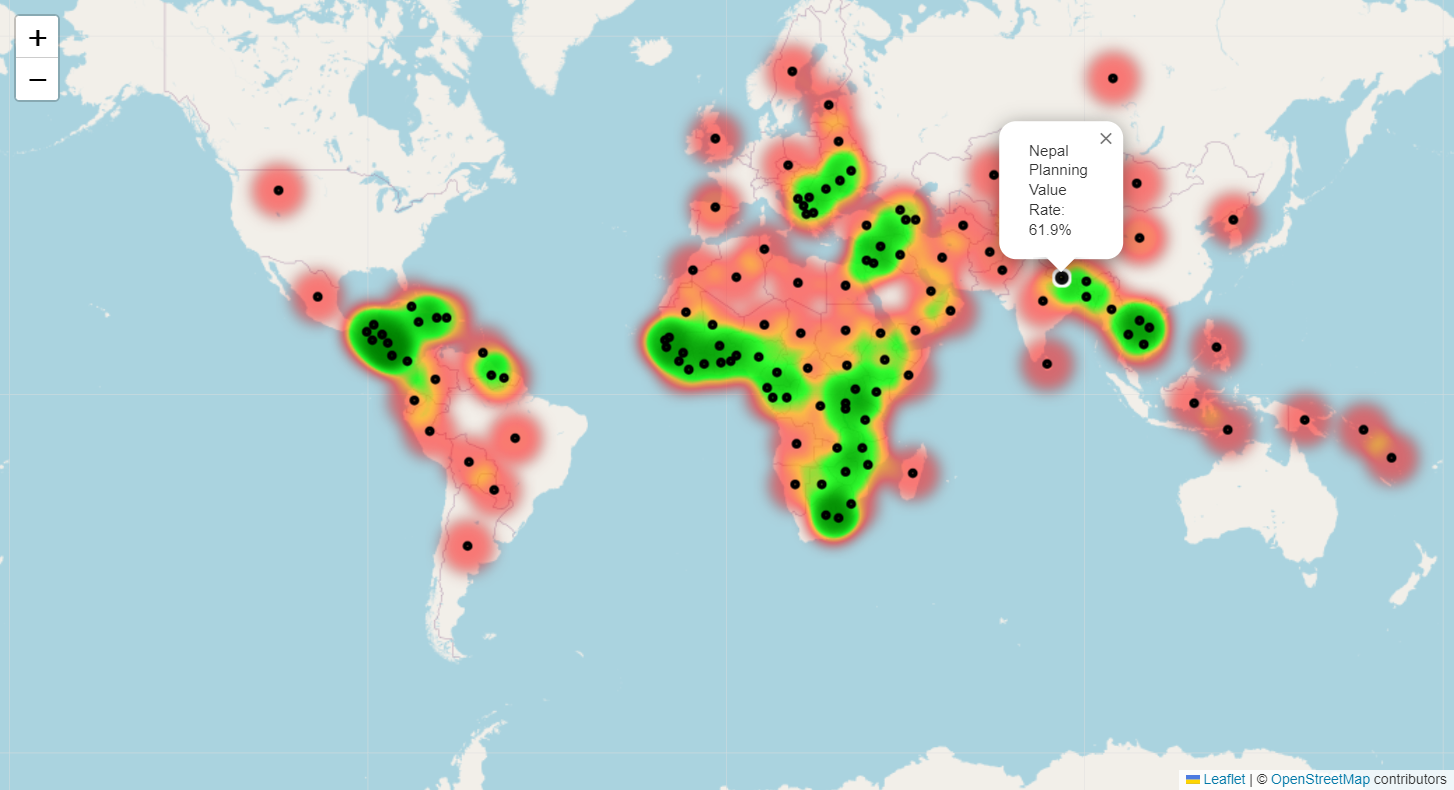

In [509]:
from IPython.display import Image
Image(filename='Output\planning_value_rate_Heatmap.png')

In [510]:
#RR-Group by Continent and Country, calculate the mean Planning_Value_Rate
continent_country_data = data_with_continents.groupby(['ParentLocation_Continent', 'Country'])['Planning_Value_Rate'].mean().reset_index()

# Sort by Planning_Value_Rate within each Continent group
continent_country_data_sorted = continent_country_data.groupby('ParentLocation_Continent').apply(lambda x: x.nlargest(3, 'Planning_Value_Rate')).reset_index(drop=True)
continent_country_data_sorted

,ParentLocation_Continent,Country,Planning_Value_Rate
0,Africa,Zimbabwe,84.8
1,Africa,Eswatini,82.9
2,Africa,Lesotho,82.8
3,Americas,Nicaragua,89.8
4,Americas,Brazil,89.3
5,Americas,Cuba,86.9
6,Eastern Mediterranean,Egypt,80.0
7,Eastern Mediterranean,Morocco,72.0
8,Eastern Mediterranean,Qatar,68.9
9,Europe,France,95.5


In [511]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(continent_country_data_sorted, how='left', left_on='name', right_on='Country')
m = folium.Map(location=[0, 0], zoom_start=2)
heat_data = [
    [row['geometry'].centroid.y, row['geometry'].centroid.x, row['Planning_Value_Rate']]
    for _, row in world.dropna(subset=['Planning_Value_Rate']).iterrows()
]
HeatMap(
    heat_data,
    gradient={0.0: '#FF0000', 0.6: '#FFFF00', 1.0: '#00FF00'},  # Red to Neon Green gradient
    radius=20,      # Adjust the radius of each point
    blur=10,        # Adjust the blur intensity for smoother heatmap appearance
    min_opacity=0.5,  # Minimum opacity for points
    max_val=float(world['Planning_Value_Rate'].max())  # Maximum value for the heatmap scale
).add_to(m)
folium.Choropleth(
    geo_data=world,
    name="choropleth",
    data=world,
    columns=["iso_a3", "Planning_Value_Rate"],
    key_on="feature.properties.iso_a3",
    fill_color="YlGnBu",  # Red to Green color scale
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Planning Value Rate (%)",
).add_to(m)

# Add markers with tooltips for each country
for _, row in world.dropna(subset=['Planning_Value_Rate']).iterrows():
    folium.Marker(
        location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
        popup=f"{row['Country']}<br>Planning Value Rate: {row['Planning_Value_Rate']}%",
        tooltip=f"{row['Country']} - {row['Planning_Value_Rate']}%",
        icon=folium.Icon(color='green', icon='info-sign'),
    ).add_to(m)

# Save the map to an HTML file
output_file = "Output/Top_3_Conyties_planning_value_rate_map.html"
m.save(output_file)
m



C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\2384529739.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\2384529739.py:8: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


In [512]:
delay = 5
fn = 'output/planning_value_rate_map.html'

tmpurl='file://{path}/{mapfile}'.format(path=os.getcwd(),mapfile=fn)
m.save(fn)

browser = webdriver.Chrome()
browser.get(tmpurl)
time.sleep(delay)

#Take a screenshot of the map
browser.save_screenshot('output/Top_3_Countries_planning_value_rate_Heatmap.png')

True

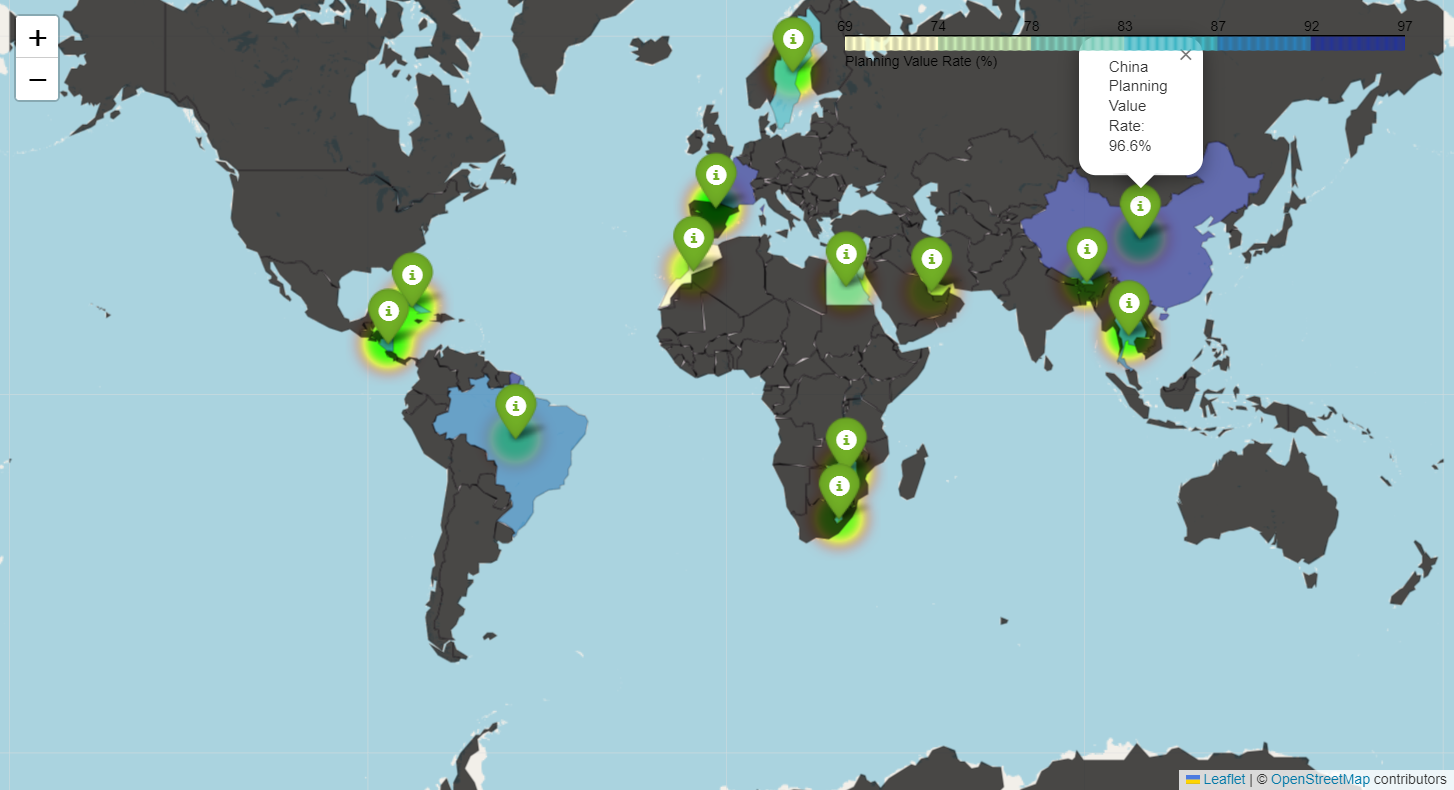

In [513]:
from IPython.display import Image
Image(filename='Output\Top_3_Countries_planning_value_rate_Heatmap.png')

Line graph for Period Range - Family planning

c:\Users\ranar\.conda\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ranar\.conda\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


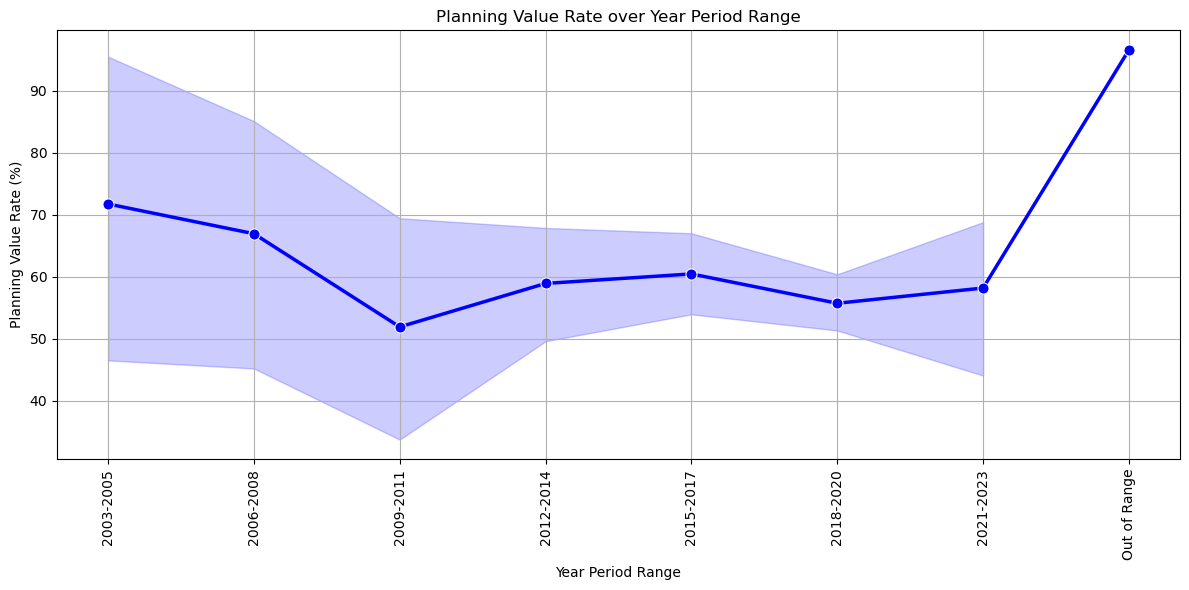

In [514]:
# Merge main_data with Period_Range on PeriodRangeID
merged_data = pd.merge(main_data, period_ranges, on='PeriodRangeID')
merged_data = merged_data.sort_values('Period_Range')

# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='Period_Range', y='Planning_Value_Rate', marker='o', markersize=8, color='b', linewidth=2.5)
plt.title('Planning Value Rate over Year Period Range')
plt.xlabel('Year Period Range')
plt.ylabel('Planning Value Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

## Question 2 (correlation between adolescent birth rate and family planning)

In [515]:
adolescent_birth= pd.read_csv('Output/adolescent_births.csv')
family_planning = pd.read_csv('Output/family_planning.csv')

In [516]:
average_birth_rate = adolescent_birth.groupby('Period_Range')['Adolescent_birth_rate'].mean()
average_birth_rate

Period_Range
2003-2005       17.600000
2006-2008       28.453333
2009-2011       28.580000
2012-2014       32.322727
2015-2017       34.072549
2018-2020       30.675410
2021-2023       11.580952
Out of Range    37.250000
Name: Adolescent_birth_rate, dtype: float64

In [517]:
# Group by Location and calculate mean Adolescent_birth_rate
birth_rate_vs_location = adolescent_birth.groupby('Location')['Adolescent_birth_rate'].mean()
birth_rate_vs_location

Location
Afghanistan                                                 40.00
Albania                                                      6.05
Algeria                                                      5.50
American Samoa                                              18.35
Andorra                                                      0.25
                                                            ...  
Wallis and Futuna Islands                                    5.00
Yemen                                                       39.00
Zambia                                                      68.75
Zimbabwe                                                    43.95
occupied Palestinian territory, including east Jerusalem    21.40
Name: Adolescent_birth_rate, Length: 223, dtype: float64

In [518]:
mean_birth_rate = adolescent_birth['Adolescent_birth_rate'].mean()
print(mean_birth_rate)

21.72579908675799


In [519]:
merged_data = pd.merge(adolescent_birth, family_planning,
                       left_on='Location',
                       right_on='Country')
merged_data.head()

,ParentLocation,Location,Age-group,Adolescent_birth_rate,FactComments_x,Starting_Year_x,Year_Ending_x,Period_Range_x,IndicatorCode,Indicator,...,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments_y,Language_Code,Starting_Year_y,Year_Ending_y,Period_Range_y
0,Eastern Mediterranean,Yemen,15-19 years,77.0,Yemen 2022-2023 Multiple Indicator Cluster Survey,2023,2023,2021-2023,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,...,YEM,Yemen,Female,15-49 years,40.5,The global indicator represents all women of r...,EN,2013,2013,2012-2014
1,Eastern Mediterranean,Yemen,10-14 years,1.0,Yemen 2013 Demographic and Health Survey,2012,2012,2012-2014,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,...,YEM,Yemen,Female,15-49 years,40.5,The global indicator represents all women of r...,EN,2013,2013,2012-2014
2,Europe,Kazakhstan,10-14 years,0.0,Registration National Statistics & WPP2022,2022,2022,2021-2023,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,...,KAZ,Kazakhstan,Female,15-49 years,73.2,The global indicator represents all women of r...,EN,2018,2018,2018-2020
3,Europe,Kazakhstan,15-19 years,19.7,Registration National Statistics,2022,2022,2021-2023,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,...,KAZ,Kazakhstan,Female,15-49 years,73.2,The global indicator represents all women of r...,EN,2018,2018,2018-2020
4,Europe,Montenegro,10-14 years,0.0,Registration National Statistics & WPP2022,2022,2022,2021-2023,SDGFPALL,Women of reproductive age (aged 15-49 years) w...,...,MNE,Montenegro,Female,15-49 years,32.9,Montenegro 2018 Multiple Indicator Cluster Survey,EN,2018,2018,2018-2020


In [520]:
# Filter relevant columns
relevant_data = merged_data[['Adolescent_birth_rate', 'Planning_Value_Rate']]

In [521]:
# Calculate correlation
correlation = relevant_data.corr()

In [522]:
# Display correlation
correlation

,Adolescent_birth_rate,Planning_Value_Rate
Adolescent_birth_rate,1.000000,-0.200183
Planning_Value_Rate,-0.200183,1.000000


# Q3-Are there correlations between family planning access and maternal

In [523]:
#IS
# Load the CSV files into DataFrames
df1 = pd.read_csv('Output/care_coverage.csv')
df2 = pd.read_csv('Output/family_planning.csv')
df3 = pd.read_csv('Output/skilled_personnel.csv')

In [524]:
df2.rename(columns={'Year_Period_Range': 'Period_Range', 'ParentLocation_Continent': 'ParentLocation'}, inplace=True)

print(df2.columns)

Index(['IndicatorCode', 'Indicator', 'Patents_Continent_Code',
       'ParentLocation', 'Country_Code', 'Country', 'Gender', 'Age_Group',
       'Planning_Value_Rate', 'FactComments', 'Language_Code', 'Starting_Year',
       'Year_Ending', 'Period_Range'],
      dtype='object')


In [525]:
print("\nSkilled Personnel:")
df3.head(3)


Skilled Personnel:


,IndicatorCode,ParentLocationCode,ParentLocation,SpatialDimValueCode,Location,Period type,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending,Period_Range
0,MDG_0000000025,SEAR,South-East Asia,IDN,Indonesia,Year,95.7,SUSENAS 2023 as part of Welfare Statistics 2023,2024-04-26 00:00:00,2023,2023,2021-2023
1,MDG_0000000025,EUR,Europe,FRA,France,Year,97.6,Institutional Birth (IB): includes all deliver...,2024-04-26 00:00:00,2023,2023,2021-2023
2,MDG_0000000025,EMR,Eastern Mediterranean,SAU,Saudi Arabia,Year,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,2023,2021-2023


In [526]:
# Merge df1 and df2 on 'ParentLocation'
merged_df = pd.merge(df1, df2, on='ParentLocation', how='inner')

# Display the merged DataFrameprint("\nMerged DataFrame:")
merged_df.head(3)

,IndicatorCode_x,Indicator_x,ParentLocation,Location,Anatal_care%,FactComments_x,Starting_Year_x,Year_Ending_x,Period_Range_x,IndicatorCode_y,...,Country_Code,Country,Gender,Age_Group,Planning_Value_Rate,FactComments_y,Language_Code,Starting_Year_y,Year_Ending_y,Period_Range_y
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,PSE,"occupied Palestinian territory, including east...",Female,15-49 years,61.0,The global indicator represents all women of r...,EN,2019,2020,2018-2020
1,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,SOM,Somalia,Female,15-49 years,2.1,The global indicator represents all women of r...,EN,2018,2019,2018-2020
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,IRQ,Iraq,Female,15-49 years,53.8,The global indicator represents all women of r...,EN,2018,2018,2018-2020


In [532]:
# Merge merged_df and df3 on 'ParentLocation'
final_merged_df= pd.merge(merged_df , df3, on='ParentLocation', how='inner')
final_merged_df.head(5)

,IndicatorCode_x,Indicator_x,ParentLocation,Location_x,Anatal_care%,FactComments_x,Starting_Year_x,Year_Ending_x,Period_Range_x,IndicatorCode_y,...,ParentLocationCode,SpatialDimValueCode,Location_y,Period type,skilled_personnel%,FactComments,DateModified,Starting_Year,Year_Ending,Period_Range
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,EMR,SAU,Saudi Arabia,Year,99.8,Women Health and Reproductive Survey,2024-04-26 00:00:00,2023,2023,2021-2023
1,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,EMR,JOR,Jordan,Year,99.9,Department of Statistics (DoS) [Jordan] and IC...,2024-04-26 00:00:00,2023,2023,2021-2023
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,EMR,YEM,Yemen,Year,60.9,Central Statistical Organization (CSO) and Uni...,2024-04-26 00:00:00,2022,2023,2021-2023
3,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,EMR,AFG,Afghanistan,Year,67.5,UNICEF. 2023. Afghanistan Multiple Indicator C...,2024-04-26 00:00:00,2022,2023,2021-2023
4,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,EMR,IRN,Iran (Islamic Republic of),Year,99.0,Health Indicators in the Islamic Republic of I...,2024-04-26 00:00:00,2022,2023,2021-2023


In [533]:
# Drop columns with NaN values
final_merged_df.dropna(axis=1, inplace=True)
print("\nMerged DataFrame:")
final_merged_df.head(3)


Merged DataFrame:


,IndicatorCode_x,Indicator_x,ParentLocation,Location_x,Anatal_care%,FactComments_x,Starting_Year_x,Year_Ending_x,Period_Range_x,IndicatorCode_y,...,IndicatorCode,ParentLocationCode,SpatialDimValueCode,Location_y,Period type,skilled_personnel%,DateModified,Starting_Year,Year_Ending,Period_Range
0,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,MDG_0000000025,EMR,SAU,Saudi Arabia,Year,99.8,2024-04-26 00:00:00,2023,2023,2021-2023
1,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,MDG_0000000025,EMR,JOR,Jordan,Year,99.9,2024-04-26 00:00:00,2023,2023,2021-2023
2,WHS4_154,Antenatal care coverage - at least four visits...,Eastern Mediterranean,Saudi Arabia,88.8,Women Health and Reproductive Care Survey 2023.,2023,2023,2021-2023,SDGFPALL,...,MDG_0000000025,EMR,YEM,Yemen,Year,60.9,2024-04-26 00:00:00,2022,2023,2021-2023


In [534]:
print(final_merged_df.columns)

Index(['IndicatorCode_x', 'Indicator_x', 'ParentLocation', 'Location_x',
       'Anatal_care%', 'FactComments_x', 'Starting_Year_x', 'Year_Ending_x',
       'Period_Range_x', 'IndicatorCode_y', 'Indicator_y',
       'Patents_Continent_Code', 'Country_Code', 'Country', 'Gender',
       'Age_Group', 'Planning_Value_Rate', 'FactComments_y', 'Language_Code',
       'Starting_Year_y', 'Year_Ending_y', 'Period_Range_y', 'IndicatorCode',
       'ParentLocationCode', 'SpatialDimValueCode', 'Location_y',
       'Period type', 'skilled_personnel%', 'DateModified', 'Starting_Year',
       'Year_Ending', 'Period_Range'],
      dtype='object')


In [535]:
# Extracting specific columns
subset_df = final_merged_df[['ParentLocation','skilled_personnel%','Anatal_care%', 'Planning_Value_Rate', 'Period_Range_x',]]

In [536]:
df = pd.DataFrame(subset_df)

In [537]:
# Ensure that all percentage columns are numeric
df['skilled_personnel%'] = pd.to_numeric(df['skilled_personnel%'], errors='coerce')
df['Anatal_care%'] = pd.to_numeric(df['Anatal_care%'], errors='coerce')
df['Planning_Value_Rate'] = pd.to_numeric(df['Planning_Value_Rate'], errors='coerce')

# Group by 'ParentLocation' and calculate the mean for each percentage column
grouped_df_mean = df.groupby('ParentLocation').agg({
    'skilled_personnel%': 'mean',
    'Anatal_care%': 'mean',
    'Planning_Value_Rate': 'mean',
    'Period_Range_x': 'first'  
})

print("\nGrouped DataFrame by 'ParentLocation' (mean):")
grouped_df_mean

C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\300186529.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_mean = df.groupby('ParentLocation').agg({



Grouped DataFrame by 'ParentLocation' (mean):


,skilled_personnel%,Anatal_care%,Planning_Value_Rate,Period_Range_x
ParentLocation,,,,
Africa,68.099313,54.419342,50.541304,2021-2023
Americas,94.357270,86.101176,72.736000,2021-2023
Eastern Mediterranean,87.081481,62.739175,50.250000,2021-2023
Europe,98.651609,88.928743,57.339130,2021-2023
South-East Asia,70.286813,55.785938,71.116667,2021-2023
Western Pacific,93.851903,77.354839,56.946667,2021-2023


In [538]:
# Ensure that all percentage columns are numeric
df['skilled_personnel%'] = pd.to_numeric(df['skilled_personnel%'], errors='coerce')
df['Anatal_care%'] = pd.to_numeric(df['Anatal_care%'], errors='coerce')
df['Planning_Value_Rate'] = pd.to_numeric(df['Planning_Value_Rate'], errors='coerce')

# Group by 'ParentLocation' and calculate the mean for each percentage column
# Keep all unique period ranges in a list
grouped_df_mean = df.groupby('ParentLocation').agg({
    'skilled_personnel%': 'mean',
    'Anatal_care%': 'mean',
    'Planning_Value_Rate': 'mean',
    'Period_Range_x': lambda x: list(x.unique())  # Keep unique period ranges in a list
})

print("\nGrouped DataFrame by 'ParentLocation' (mean):")
grouped_df_mean

C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\2761389151.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_mean = df.groupby('ParentLocation').agg({



Grouped DataFrame by 'ParentLocation' (mean):


,skilled_personnel%,Anatal_care%,Planning_Value_Rate,Period_Range_x
ParentLocation,,,,
Africa,68.099313,54.419342,50.541304,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."
Americas,94.357270,86.101176,72.736000,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."
Eastern Mediterranean,87.081481,62.739175,50.250000,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."
Europe,98.651609,88.928743,57.339130,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."
South-East Asia,70.286813,55.785938,71.116667,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."
Western Pacific,93.851903,77.354839,56.946667,"[2021-2023, 2018-2020, 2015-2017, 2012-2014, 2..."


In [539]:
# Ensure that all percentage columns are numeric
df['skilled_personnel%'] = pd.to_numeric(df['skilled_personnel%'], errors='coerce')
df['Anatal_care%'] = pd.to_numeric(df['Anatal_care%'], errors='coerce')
df['Planning_Value_Rate'] = pd.to_numeric(df['Planning_Value_Rate'], errors='coerce')

# Group by 'ParentLocation' and calculate the mean for each percentage column
grouped_df_mean = df.groupby('ParentLocation').agg({
    'skilled_personnel%': 'mean',
    'Anatal_care%': 'mean',
    'Planning_Value_Rate': 'mean',
    'Period_Range_x': 'first'  
})

print("\nGrouped DataFrame by 'ParentLocation' (mean):")
grouped_df_mean

C:\Users\ranar\AppData\Local\Temp\ipykernel_6824\300186529.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_mean = df.groupby('ParentLocation').agg({



Grouped DataFrame by 'ParentLocation' (mean):


,skilled_personnel%,Anatal_care%,Planning_Value_Rate,Period_Range_x
ParentLocation,,,,
Africa,68.099313,54.419342,50.541304,2021-2023
Americas,94.357270,86.101176,72.736000,2021-2023
Eastern Mediterranean,87.081481,62.739175,50.250000,2021-2023
Europe,98.651609,88.928743,57.339130,2021-2023
South-East Asia,70.286813,55.785938,71.116667,2021-2023
Western Pacific,93.851903,77.354839,56.946667,2021-2023


In [540]:
print(grouped_df_mean.columns)

Index(['skilled_personnel%', 'Anatal_care%', 'Planning_Value_Rate',
       'Period_Range_x'],
      dtype='object')


In [541]:
grouped_df_mean = grouped_df_mean.reset_index()

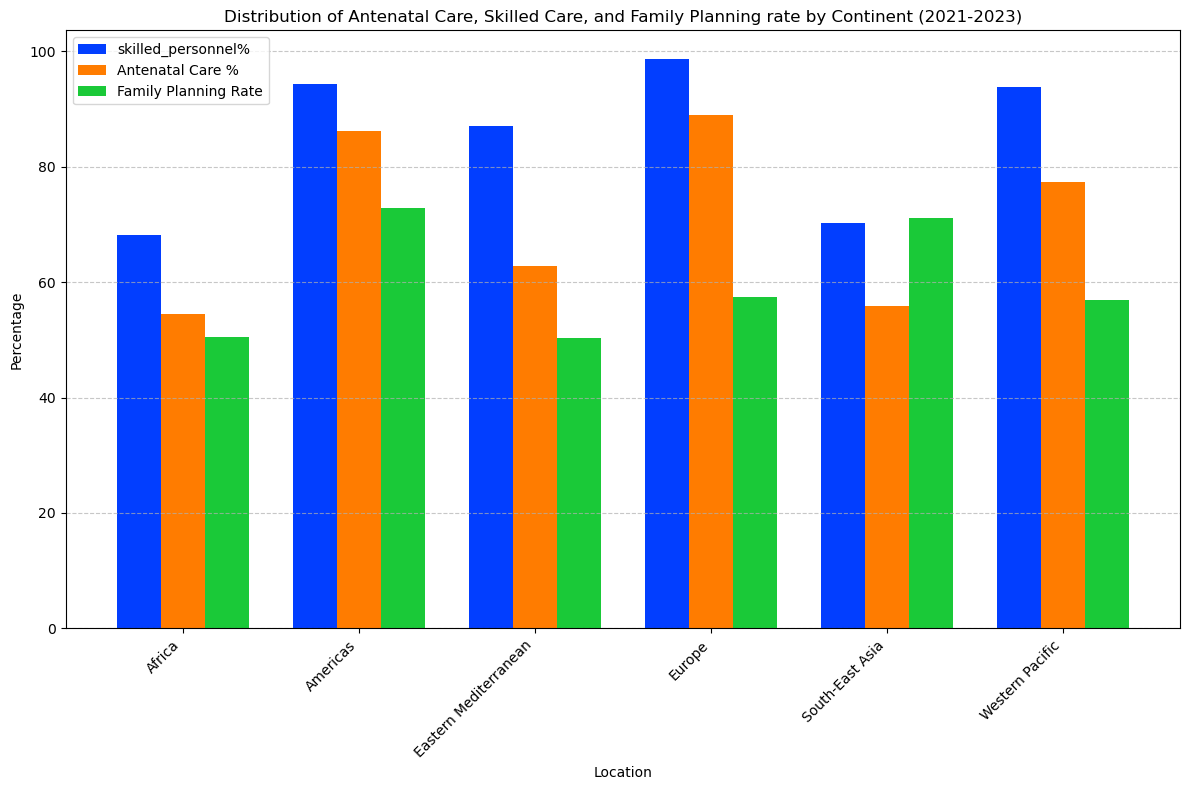

In [543]:
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.25
indices = np.arange(len(grouped_df_mean))

p1 = ax.bar(indices - bar_width, grouped_df_mean['skilled_personnel%'], bar_width, label='skilled_personnel%')
p2 = ax.bar(indices, grouped_df_mean['Anatal_care%'], bar_width, label='Antenatal Care %')
p3 = ax.bar(indices + bar_width, grouped_df_mean['Planning_Value_Rate'], bar_width, label='Family Planning Rate')

ax.set_xlabel('Location')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Antenatal Care, Skilled Care, and Family Planning rate by Continent (2021-2023)')
ax.set_xticks(indices)
ax.set_xticklabels(grouped_df_mean['ParentLocation'], rotation=45, ha='right')
ax.legend()

# Adding grid lines
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

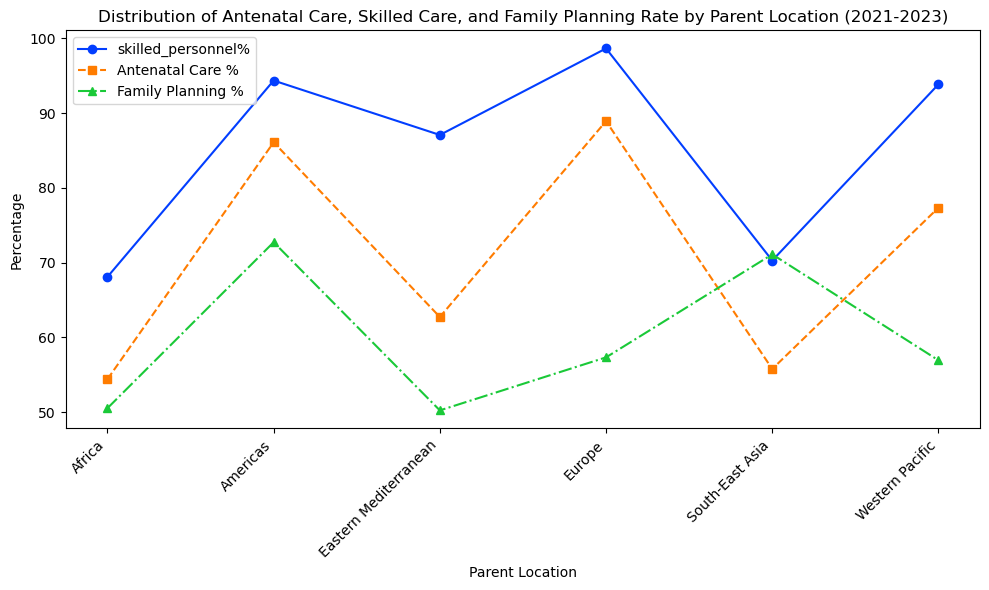

In [544]:
# Plotting the line graph
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting lines for each variable
ax.plot(grouped_df_mean['ParentLocation'], grouped_df_mean['skilled_personnel%'], marker='o', linestyle='-', label='skilled_personnel%')
ax.plot(grouped_df_mean['ParentLocation'], grouped_df_mean['Anatal_care%'], marker='s', linestyle='--', label='Antenatal Care %')
ax.plot(grouped_df_mean['ParentLocation'], grouped_df_mean['Planning_Value_Rate'], marker='^', linestyle='-.', label='Family Planning %')

# Adding labels and title
ax.set_xlabel('Parent Location')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Antenatal Care, Skilled Care, and Family Planning Rate by Parent Location (2021-2023)')
ax.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Main Question

In [ ]:
#LR# Drop period that is out of range for each dataframe
# for skilled personnel
filtered_skilled_personnel = clean_df_skilled_personnel[clean_df_skilled_personnel["Period_Range"] == "Out of Range" ]
clean_df_skilled_personnel_range = clean_df_skilled_personnel.drop(filtered_skilled_personnel.index)

In [ ]:
#LR# Drop period that is out of range for each dataframe
# for family planning
filtered_family_planning = Cleaned_Data[Cleaned_Data["Period_Range"]== "Out of Range"]
Cleaned_Data_range = Cleaned_Data.drop(filtered_family_planning.index)

In [ ]:
#LR# Drop period that is out of range for each dataframe
# for adolescent birth rate
filtered_adolescent_birth = hDf_cleaned[hDf_cleaned["Period_Range"]== "Out of Range"]
hDf_cleaned_range = hDf_cleaned.drop(filtered_adolescent_birth.index)

In [ ]:
#LR# Drop period that is out of range for each dataframe
# for health care coverage
filtered_health_coverage = cleaned_care_coverage_df[cleaned_care_coverage_df["Period_Range"]== "Other"]
cleaned_care_coverage_df_range = cleaned_care_coverage_df.drop(filtered_health_coverage.index)

In [ ]:
#LR# cleaned_care_coverage_df["Anatal_care%"] = cleaned_care_coverage_df["Anatal_care%"].astype(float)
cleaned_care_coverage_df_range['Anatal_care%'] = pd.to_numeric(cleaned_care_coverage_df_range['Anatal_care%'], errors='coerce')

In [ ]:
#LR# Check number of countries and continents per dataframe
Cleaned_Data_range.nunique()
hDf_cleaned_range.nunique()
clean_df_skilled_personnel_range.nunique()
cleaned_care_coverage_df_range.nunique()

IndicatorCode       1
Indicator           1
ParentLocation      6
Location          165
Anatal_care%      452
FactComments      382
Starting_Year      27
Year_Ending        21
Period_Range        7
dtype: int64

In [ ]:
#LR# Check the  of countries and continents per dataframe
cleaned_care_coverage_df_range["ParentLocation"].unique()
Cleaned_Data_range["ParentLocation_Continent"].unique()
clean_df_skilled_personnel_range["ParentLocation"].unique()
hDf_cleaned_range["ParentLocation"].unique()

array(['Europe', 'Eastern Mediterranean', 'Global', 'Western Pacific',
       'Americas', 'Africa', 'South-East Asia'], dtype=object)

In [ ]:
#LR# Check datatype for Family planning df
Cleaned_Data_range.dtypes
#LR# Check datatype for care coverage
hDf_cleaned_range.dtypes
#LR# Check datatype for skilled personnnel
clean_df_skilled_personnel_range.dtypes
#LR#  Check datatype for care coverage 
cleaned_care_coverage_df_range.dtypes

IndicatorCode      object
Indicator          object
ParentLocation     object
Location           object
Anatal_care%      float64
FactComments       object
Starting_Year       int64
Year_Ending         int64
Period_Range       object
dtype: object

In [ ]:
#LR# Group each dataframe by continent
#Family planning
continent_family_planning = Cleaned_Data_range.groupby('ParentLocation_Continent')["Planning_Value_Rate"].mean()
continent_family_planning

ParentLocation_Continent
Africa                   50.541304
Americas                 72.736000
Eastern Mediterranean    50.250000
Europe                   57.339130
South-East Asia          71.116667
Western Pacific          54.114286
Name: Planning_Value_Rate, dtype: float64

In [ ]:
#LR# Group each dataframe by continent
#Adolescent birth rate
continent_adolescent_birth = hDf_cleaned_range.groupby('ParentLocation')["Adolescent_birth_rate"].mean()
continent_adolescent_birth

ParentLocation
Africa                   48.008247
Americas                 20.142553
Eastern Mediterranean    17.972093
Europe                    6.018182
Global                    1.533333
South-East Asia          14.786364
Western Pacific          17.529688
Name: Adolescent_birth_rate, dtype: float64

In [ ]:
#LR# Group each dataframe by continent
# Health Coverage
continent_health_coverage = cleaned_care_coverage_df_range.groupby('ParentLocation')["Anatal_care%"].mean()
continent_health_coverage

ParentLocation
Africa                   57.561290
Americas                 87.859786
Eastern Mediterranean    66.826667
Europe                   90.459603
South-East Asia          63.052000
Western Pacific          80.029885
Name: Anatal_care%, dtype: float64

In [ ]:
#LR# Group each dataframe by continent
# Skilled personnel
continent_skilled_personnel = clean_df_skilled_personnel_range.groupby('ParentLocation')['skilled_personnel%'].mean()
continent_skilled_personnel

ParentLocation
Africa                   70.198814
Americas                 94.972496
Eastern Mediterranean    87.767647
Europe                   98.722461
South-East Asia          73.830000
Western Pacific          94.385417
Name: skilled_personnel%, dtype: float64

In [ ]:
family_planning_summary = pd.DataFrame({"Family planning": continent_family_planning,
                                        "Adolescent birth rate": continent_adolescent_birth,
                                        "Health care coverage": continent_health_coverage,
                                        "Skilled personnel": continent_skilled_personnel})

family_planning_summary.head()

,Family planning,Adolescent birth rate,Health care coverage,Skilled personnel
Africa,50.541304,48.008247,57.561290,70.198814
Americas,72.736000,20.142553,87.859786,94.972496
Eastern Mediterranean,50.250000,17.972093,66.826667,87.767647
Europe,57.339130,6.018182,90.459603,98.722461
Global,NaN,1.533333,NaN,NaN


In [ ]:
#LR# round each indicator to 2 decimals and drop "global" is out of range for each dataframe as it is not part of a continent
family_planning_summary_rounded = family_planning_summary.round(2)
filtered_family_planning = family_planning_summary_rounded[family_planning_summary_rounded["Adolescent birth rate"]== 1.53]
family_planning_summary_rounded_cleaned = family_planning_summary_rounded.drop(filtered_family_planning.index)
family_planning_summary_rounded_cleaned

,Family planning,Adolescent birth rate,Health care coverage,Skilled personnel
Africa,50.54,48.01,57.56,70.20
Americas,72.74,20.14,87.86,94.97
Eastern Mediterranean,50.25,17.97,66.83,87.77
Europe,57.34,6.02,90.46,98.72
South-East Asia,71.12,14.79,63.05,73.83
Western Pacific,54.11,17.53,80.03,94.39


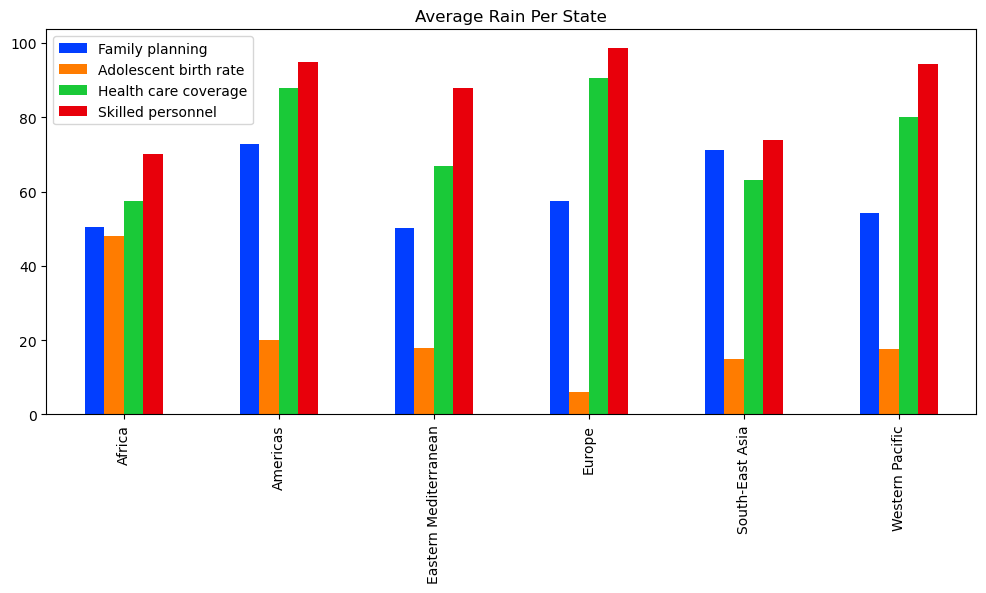

<Figure size 640x480 with 0 Axes>

In [ ]:
family_planning_summary_rounded_cleaned.plot(kind="bar", figsize=(12,5))

# Set a title for the chart
plt.title("Average Rain Per State")

plt.show()
plt.tight_layout()

In [ ]:
#LR# Group each dataframe by continent by date range
#Family planning
continent_family_planning_range = Cleaned_Data_range.groupby('Period_Range')["Planning_Value_Rate"].mean()
#Adolescent birth rate
continent_adolescent_birth_range = hDf_cleaned_range.groupby('Period_Range')["Adolescent_birth_rate"].mean()
# Health Coverage
continent_health_coverage_range = cleaned_care_coverage_df_range.groupby('Period_Range')["Anatal_care%"].mean()
# Skilled personnel
continent_skilled_personnel_range = clean_df_skilled_personnel_range.groupby('Period_Range')['skilled_personnel%'].mean()

In [ ]:
family_planning_summary_range = pd.DataFrame({"Family planning": continent_family_planning_range,
                                        "Adolescent birth rate": continent_adolescent_birth_range,
                                        "Health care coverage": continent_health_coverage_range,
                                        "Skilled personnel": continent_skilled_personnel_range})

family_planning_summary__range_rounded = family_planning_summary_range.round(2)
family_planning_summary__range_rounded.reset_index()

,Period_Range,Family planning,Adolescent birth rate,Health care coverage,Skilled personnel
0,2003-2005,71.73,17.60,69.85,89.00
1,2006-2008,66.93,28.45,75.55,88.73
2,2009-2011,51.90,28.58,77.99,91.20
3,2012-2014,58.91,32.32,80.03,92.48
4,2015-2017,60.45,34.07,80.52,93.30
5,2018-2020,55.71,30.68,79.51,94.53
6,2021-2023,58.18,11.58,78.23,94.52


c:\Users\ranar\.conda\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ranar\.conda\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


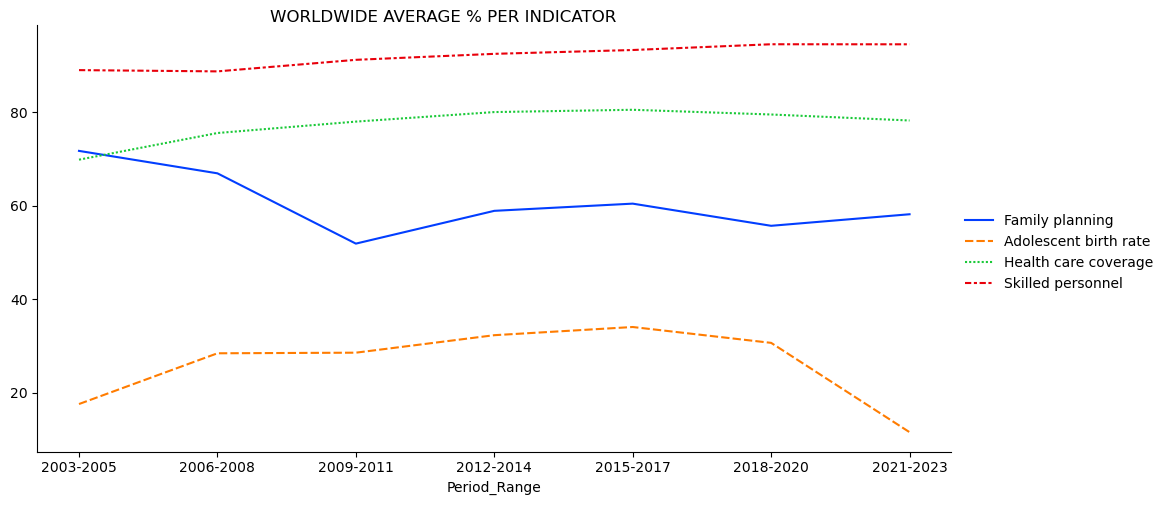

In [ ]:
# Graph a line chart per period range
# Soruce: https://seaborn.pydata.org/tutorial/data_structure.html
graph = sns.relplot(family_planning_summary__range_rounded, kind="line", height=5, aspect=2)
graph.fig.suptitle("WORLDWIDE AVERAGE % PER INDICATOR", x=0.4, y=1.0)
sns.set_palette("bright")